Regresión lineal

En los sistemas de bicicletas compartidas, el proceso de arriendo y devolución es automatizado. Normalmente, las bicicletas se pueden arrendar en un lugar y regresar en otro sin tener que depender de humanos. Actualmente, existen varios programas para compartir bicicletas en diferentes ciudades. El conjunto de datos bikes.csv, se deriva de un registro de dos años de un sistema de uso compartido de bicicletas en determinada ciudad.

Las variables disponibles son las siguientes:

* **date**:La fecha completa, en formato año-mes-día.

* **season**:Temporada del año, 1 a 4.

* **year**:Año (0 = 2020, 1 = 2021).

* **month**:Mes (1 a 12).

* **holiday**:Si el día es feriado o no.

* **weekday**:Día de la semana (codificado de 0 a 6).

* **workingday**:1 para días laborables, 0 para fines de semana y festivos

* **weather**:Codificado de la siguiente manera:

1)Claro a parcialmente nublado.

2)Niebla, pero sin precipitaciones más intensas. 

3)Lluvia ligera o nieve, posiblemente con truenos.

4)Fuertes lluvias o nieve.

* **temp**:Temperatura normalizada en grados celsius. Los valores se obtienen mediante (t − tmin)/(tmax − tmin), tmin = −8, tmax = +39.

* **atemp**:Temperatura de sensación normalizada en grados celsius. Los valores se obtienen mediante (t − tmin)/(tmax − tmin), tmin = −16, tmax = +50.

* **humidity**:Humedad normalizada (= humedad real dividida por 100).

* **windspeed**:Velocidad normalizada del viento (= velocidad real del viento en millas por hora dividido por 67).

* **registered**:Número de alquileres de bicicletas ese día por usuarios registrados.

* **Target**:Cantidad total de arriendos de bicicletas ese día, incluidos los casuales y los usuarios registrados.

Pregunta 1 :Cargue la base de datos bike.csv. Realice las siguientes procesos de limpieza

Transforme a factor las variables categóricas.

Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada. Use las siguientes fórmulas respectivamente:
(47*temp-8).
(66*atemp-16).

Transforme la variable humedad a porcentaje (multiplique la variable por 100).

Transforme la velocidad del viento a millas por hora (multiplique por 67 el valor de la variable normalizada).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (10, 8)
%config InlineBackend.figure_format = 'retina'

/var/folders/tg/h6x1ph8j2dbgdffzjyvt5s8r0000gn/T/ipykernel_9980/4113444371.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
#procedemos a leer y guardar la base de datos de biciletas

bicis= pd.read_csv('bikes.csv', parse_dates=['date'])

In [3]:
#verificamos el tipo de varibales y la informacion de la base de datos

print('Informacion Base Bicicletas')
print('Shape',bicis.shape)

display(bicis.head())
display(bicis.info())


Informacion Base Bicicletas
Shape (731, 14)


,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,registered,Target
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1518,1600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   year        731 non-null    int64         
 3   month       731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  registered  731 non-null    int64         
 13  Target      731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB


None

In [4]:
#Procedemos a cambiar las variables categoricas y  a realizar las dummies de estas categorias para el modelo

variables_categoricas=['season', 'year', 'month','holiday', 'weekday', 'workingday', 'weather']
bicis= pd.get_dummies(bicis, columns=variables_categoricas, drop_first=True)

display(bicis.head())

,date,temp,atemp,humidity,windspeed,registered,Target,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,2011-01-01,0.344167,0.363625,0.805833,0.160446,654,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2011-01-02,0.363478,0.353739,0.696087,0.248539,670,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2011-01-03,0.196364,0.189405,0.437273,0.248309,1229,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2011-01-04,0.200000,0.212122,0.590435,0.160296,1454,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2011-01-05,0.226957,0.229270,0.436957,0.186900,1518,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [5]:
#procedemos a transformar a grados celcius variables temp y atemp, ademas de la humedad a porcentaje y windspeed

bicis['temp']= bicis['temp'].apply(lambda x:47*x-8)
bicis['atemp']=bicis['atemp'].apply(lambda x: 66*x-16)
bicis['humidity']=bicis['humidity'].apply(lambda x: x*100)
bicis['windspeed']=bicis['windspeed'].apply(lambda x: x*67)

display(bicis.head())

,date,temp,atemp,humidity,windspeed,registered,Target,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,2011-01-01,8.175849,7.999250,80.5833,10.749882,654,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2011-01-02,9.083466,7.346774,69.6087,16.652113,670,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2011-01-03,1.229108,-3.499270,43.7273,16.636703,1229,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2011-01-04,1.400000,-1.999948,59.0435,10.739832,1454,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2011-01-05,2.666979,-0.868180,43.6957,12.522300,1518,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Pregunta 2: Realice un gráfico del número de arriendos de bicicletas vs temperatura, además, añada una curva de regresión lineal. ¿Cuál es la relación entre el número de arriendos con la temperatura?

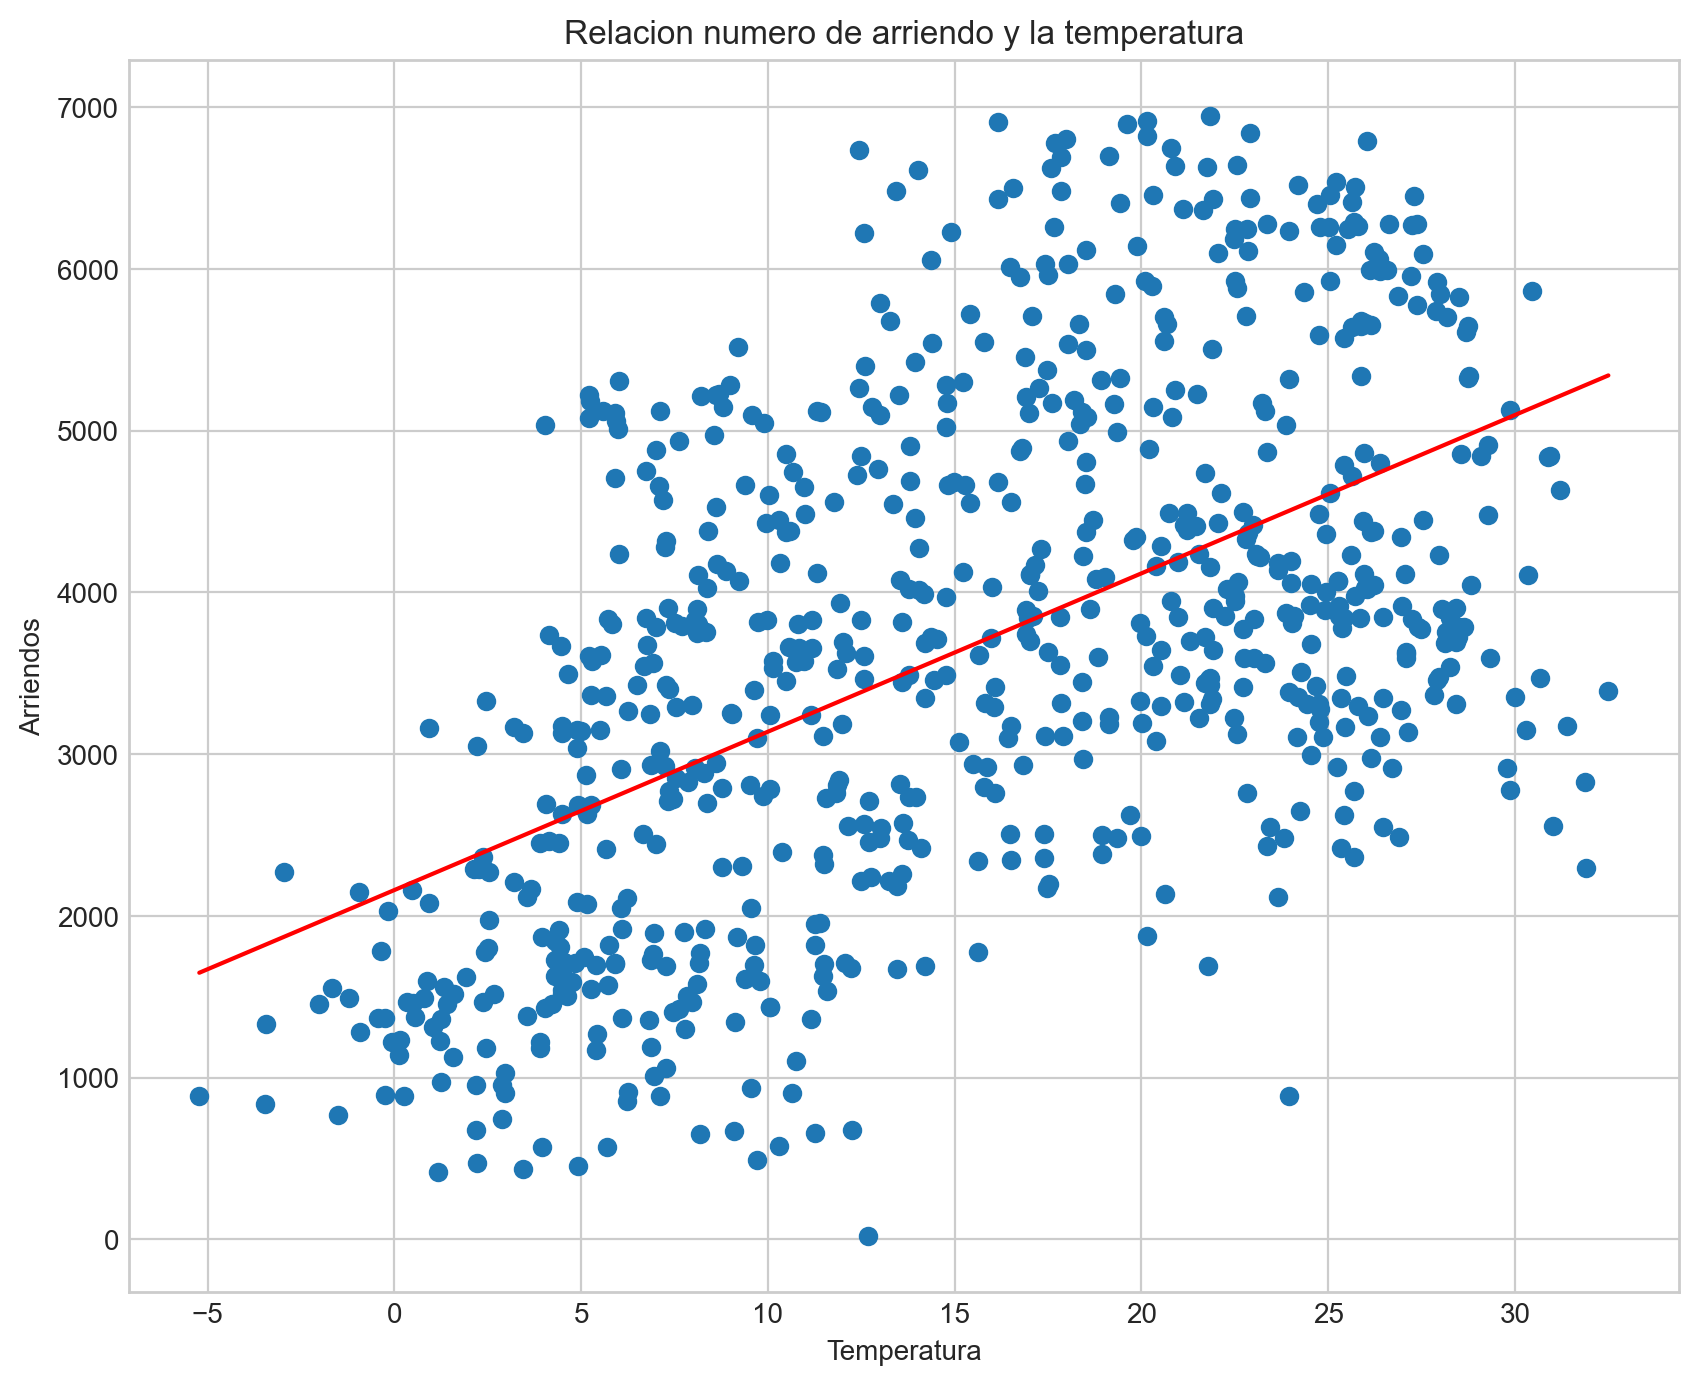

In [6]:
#procedemos a realizar grafico de numero de arriedo de biciletas
plt.scatter(bicis['temp'],bicis['registered'])

coefficients = np.polyfit(bicis['temp'], bicis['registered'], 1)  # Realizar regresión lineal de grado 1
polynomial = np.poly1d(coefficients)
x_values = np.linspace(bicis['temp'].min(), bicis['temp'].max(), 100)  # Generar valores x para la curva
y_values = polynomial(x_values)  # Obtener los valores y correspondientes a los valores x
plt.plot(x_values, y_values, color='red', label='Regresión lineal')


plt.xlabel('Temperatura')
plt.ylabel('Arriendos')
plt.title('Relacion numero de arriendo y la temperatura')



plt.show()

In [7]:
print(polynomial)

 
97.93 x + 2159


La relacion que tienen estas variables es alta. Lo que implica que a medida que la temperatura varia, se ven afectados la cantidad de arriendos de bicicletas que se tiene. En los extremos del grafico especificamente,se puede ver que cuando la temperatura es muy baja, el arriendo de bicicletas disminuye o cuando es mas alta, el arriendo de aumenta. Teniendo una relacion positiva entre ambas variables.

Pregunta 3:

¿Es la relación entre la temperatura y el número de bicicletas arrendas igual en los dos años?, realice en un mismo gráfico la relación entre el número de arriendo vs temperatura para los dos años, añada las curvas de regresión lineal.


In [8]:
display(bicis.columns)
display(bicis.head())

Index(['date', 'temp', 'atemp', 'humidity', 'windspeed', 'registered',
       'Target', 'season_2', 'season_3', 'season_4', 'year_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1', 'weather_2', 'weather_3'],
      dtype='object')

,date,temp,atemp,humidity,windspeed,registered,Target,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,2011-01-01,8.175849,7.999250,80.5833,10.749882,654,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2011-01-02,9.083466,7.346774,69.6087,16.652113,670,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2011-01-03,1.229108,-3.499270,43.7273,16.636703,1229,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2011-01-04,1.400000,-1.999948,59.0435,10.739832,1454,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2011-01-05,2.666979,-0.868180,43.6957,12.522300,1518,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


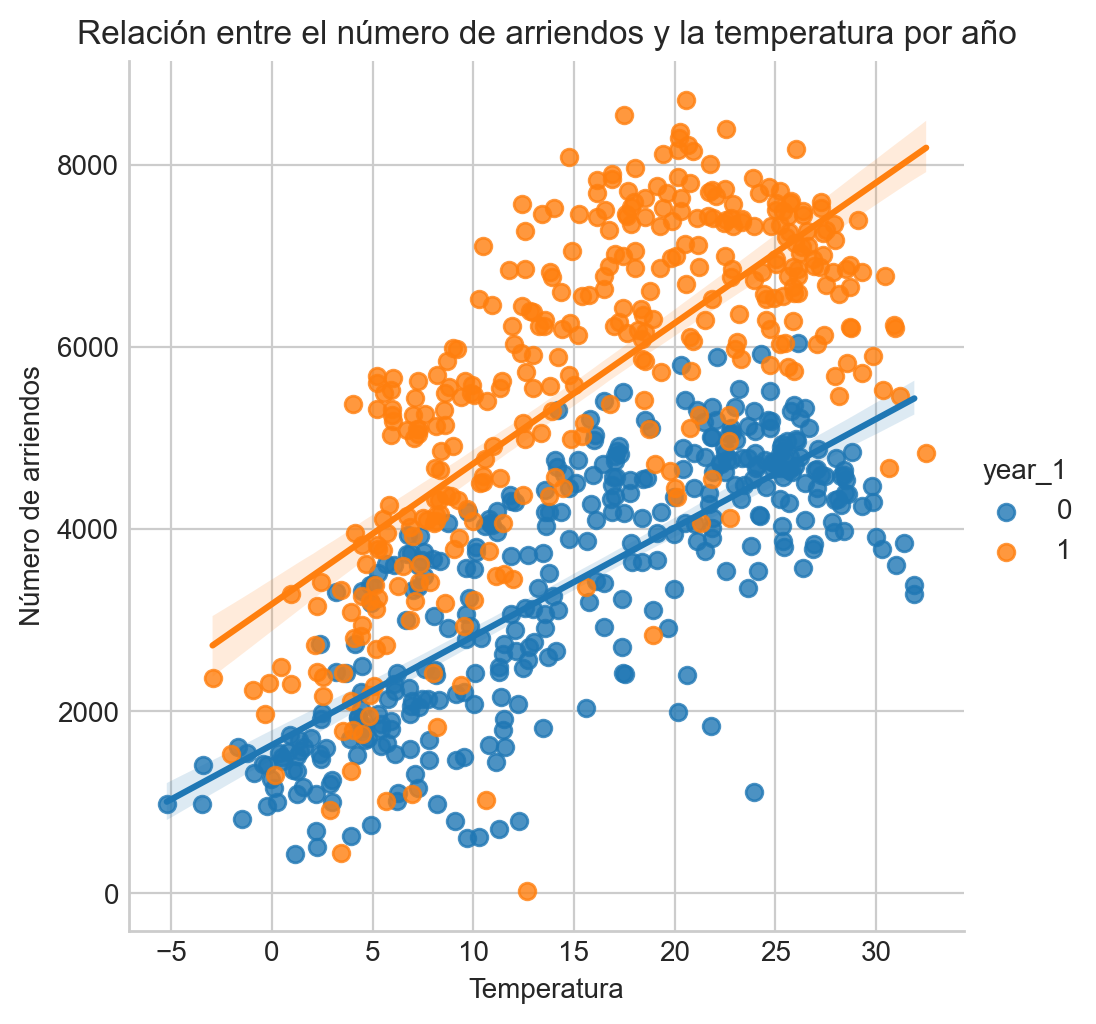

In [9]:
# Gráfico de dispersión con líneas de regresión lineal para cada año

sns.lmplot(x='temp', y='Target', hue='year_1', data=bicis)

# Título y etiquetas de los ejes
plt.title('Relación entre el número de arriendos y la temperatura por año')
plt.xlabel('Temperatura')
plt.ylabel('Número de arriendos')

# Mostrar el gráfico
plt.show()

La relacion entre el arriendo de las bicicletas y su temperatura parece que se comportan de la misma menera en terminos de relacion. Pero se puede apreciar que el año 2021 tiene una mayor relacion, ya que aumenta la pendiente del grafico. Además, a execpcion de algunos casos especificos, el numero de arriendos para el año 2021 fue mayor.

Pregunta 4:

Por selección forward, construya un modelo sin considerar las variables

* **date**
* **month**
* **registered**


Interpreta el factor asociado a la Temperatura y días feriados.


In [10]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [11]:
bicis.columns

Index(['date', 'temp', 'atemp', 'humidity', 'windspeed', 'registered',
       'Target', 'season_2', 'season_3', 'season_4', 'year_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1', 'weather_2', 'weather_3'],
      dtype='object')

In [12]:
#modelo original y procedemos a eliminar las variables mencioandas anteriormente.

x=bicis.drop(['registered', 'date','month_2','month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8','month_9', 'month_10', 'month_11', 'month_12', 'Target'], axis=1)
y=bicis['Target']

x=sm.add_constant(x)

modelo= sm.OLS(y,x)
modelo=modelo.fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.97e-258
Time:                        23:10:19   Log-Likelihood:                -5927.3
No. Observations:                 731   AIC:                         1.189e+04
Df Residuals:                     713   BIC:                         1.197e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2246.9384    240.702      9.335      0.000    1774.370    2719.507
temp            84.2605     29.510      2.855      0.004      26.324     142.197
atemp           19.1717     22.949      0.835      0.404     -25.883      64.227
humidity       -12.3543      2.944     -4.196      0.000     -18.134      -6.574
windspeed      -40.5147      6.437     -6.294      0.000     -53.152     -27.878
season_2      1136.9785    112.493     10.107      0.000     916.121    1357.836
season_3       854.4831    149.178      5.728      0.000     561.603    1147.363
season_4      1538.9881     95.919     16.045      0.000    1350.671    1727.305
year_1        2017.7533     61.156     32.993      0.000    1897.685    2137.821
holiday_1     -320.6520    168.101     -1.907      0.057    -650.684       9.380
weekday_1     -127.3514     75.589     -1.685      0.092    -275.755      21.053
weekday_2      -40.1262     81.587     -0.492      0.623    -200.306     120.053
weekday_3       30.8555     81.926      0.377      0.707    -129.990     191.701
weekday_4       53.2454     81.077      0.657      0.512    -105.932     212.423
weekday_5       98.3948     81.530      1.207      0.228     -61.672     258.462
weekday_6      442.9183    112.695      3.930      0.000     221.665     664.171
workingday_1   335.6701     70.483      4.762      0.000     197.291     474.049
weather_2     -448.2993     80.783     -5.549      0.000    -606.900    -289.699
weather_3    -1965.5276    206.748     -9.507      0.000   -2371.434   -1559.621
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.130
Skew:                          -0.737   Prob(JB):                     4.78e-50
Kurtosis:                       5.299   Cond. No.                     2.84e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
%pip install stepwise-regression


Note: you may need to restart the kernel to use updated packages.


In [14]:
#realizamos el modelo mediante metodologia forward

from stepwise_regression import step_reg

ford_selection= step_reg.forward_regression(x, y, 0.05, verbose=False)
ford_selection

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/stepwise_regression/step_reg.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/Users/raimundoschulzehot/miniconda3/envs/diplomado/

['const',
 'atemp',
 'year_1',
 'season_4',
 'weather_3',
 'weather_2',
 'season_2',
 'season_3',
 'windspeed',
 'humidity',
 'holiday_1',
 'temp']

In [15]:
#ajustamos modelo segun las variables que nos entrego la metodologia anterior.

x_ford= x[ford_selection]
ford_model=sm.OLS(y,x_ford).fit()
ford_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     301.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          9.87e-261
Time:                        23:10:20   Log-Likelihood:                -5939.0
No. Observations:                 731   AIC:                         1.190e+04
Df Residuals:                     719   BIC:                         1.196e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2595.2769    229.670     11.300      0.000    2144.373    3046.180
atemp         14.0195     23.132      0.606      0.545     -31.394      59.433
year_1      2013.2853     61.868     32.542      0.000    1891.822    2134.749
season_4    1539.3617     97.019     15.867      0.000    1348.887    1729.836
weather_3  -1891.9461    207.877     -9.101      0.000   -2300.064   -1483.828
weather_2   -415.1872     81.286     -5.108      0.000    -574.773    -255.602
season_2    1130.3972    113.750      9.938      0.000     907.076    1353.718
season_3     841.4258    150.748      5.582      0.000     545.466    1137.385
windspeed    -41.2764      6.503     -6.347      0.000     -54.043     -28.509
humidity     -13.5668      2.960     -4.583      0.000     -19.379      -7.755
holiday_1   -702.1517    182.875     -3.840      0.000   -1061.185    -343.118
temp          91.8754     29.738      3.089      0.002      33.492     150.259
==============================================================================
Omnibus:                       92.058   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.265
Skew:                          -0.703   Prob(JB):                     5.97e-46
Kurtosis:                       5.205   Cond. No.                         589.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Anteriormente se puede ver el final de la seleccion medieante metodo fordward. Respecto a la temperatura y dias feriados(holiday), los coeficiente corresponden a 91,8754, lo que quiere decir que la temperatura tienen un efecto positivo en la variable de interes, en este caso un aumento en la temperatura esta relacionado en un aumento en la variable de interes la cual es el target. Respecto a holiday, corresponde a -702.1517, esto quiere decir que tiene un efecto negativo, lo que lleva a reducir el target de bicicletas cuando es un holiday.

Pregunta 5 

Utilice los residuos del modelo elegido para estudiar la validez de los supuestos:

* **Normalidad**
* *Independencia*
* **Igualdad de varianzas (homocedasticidad)**

¿Es un modelo adecuado estadísticamente? Justifique sus afirmaciones.

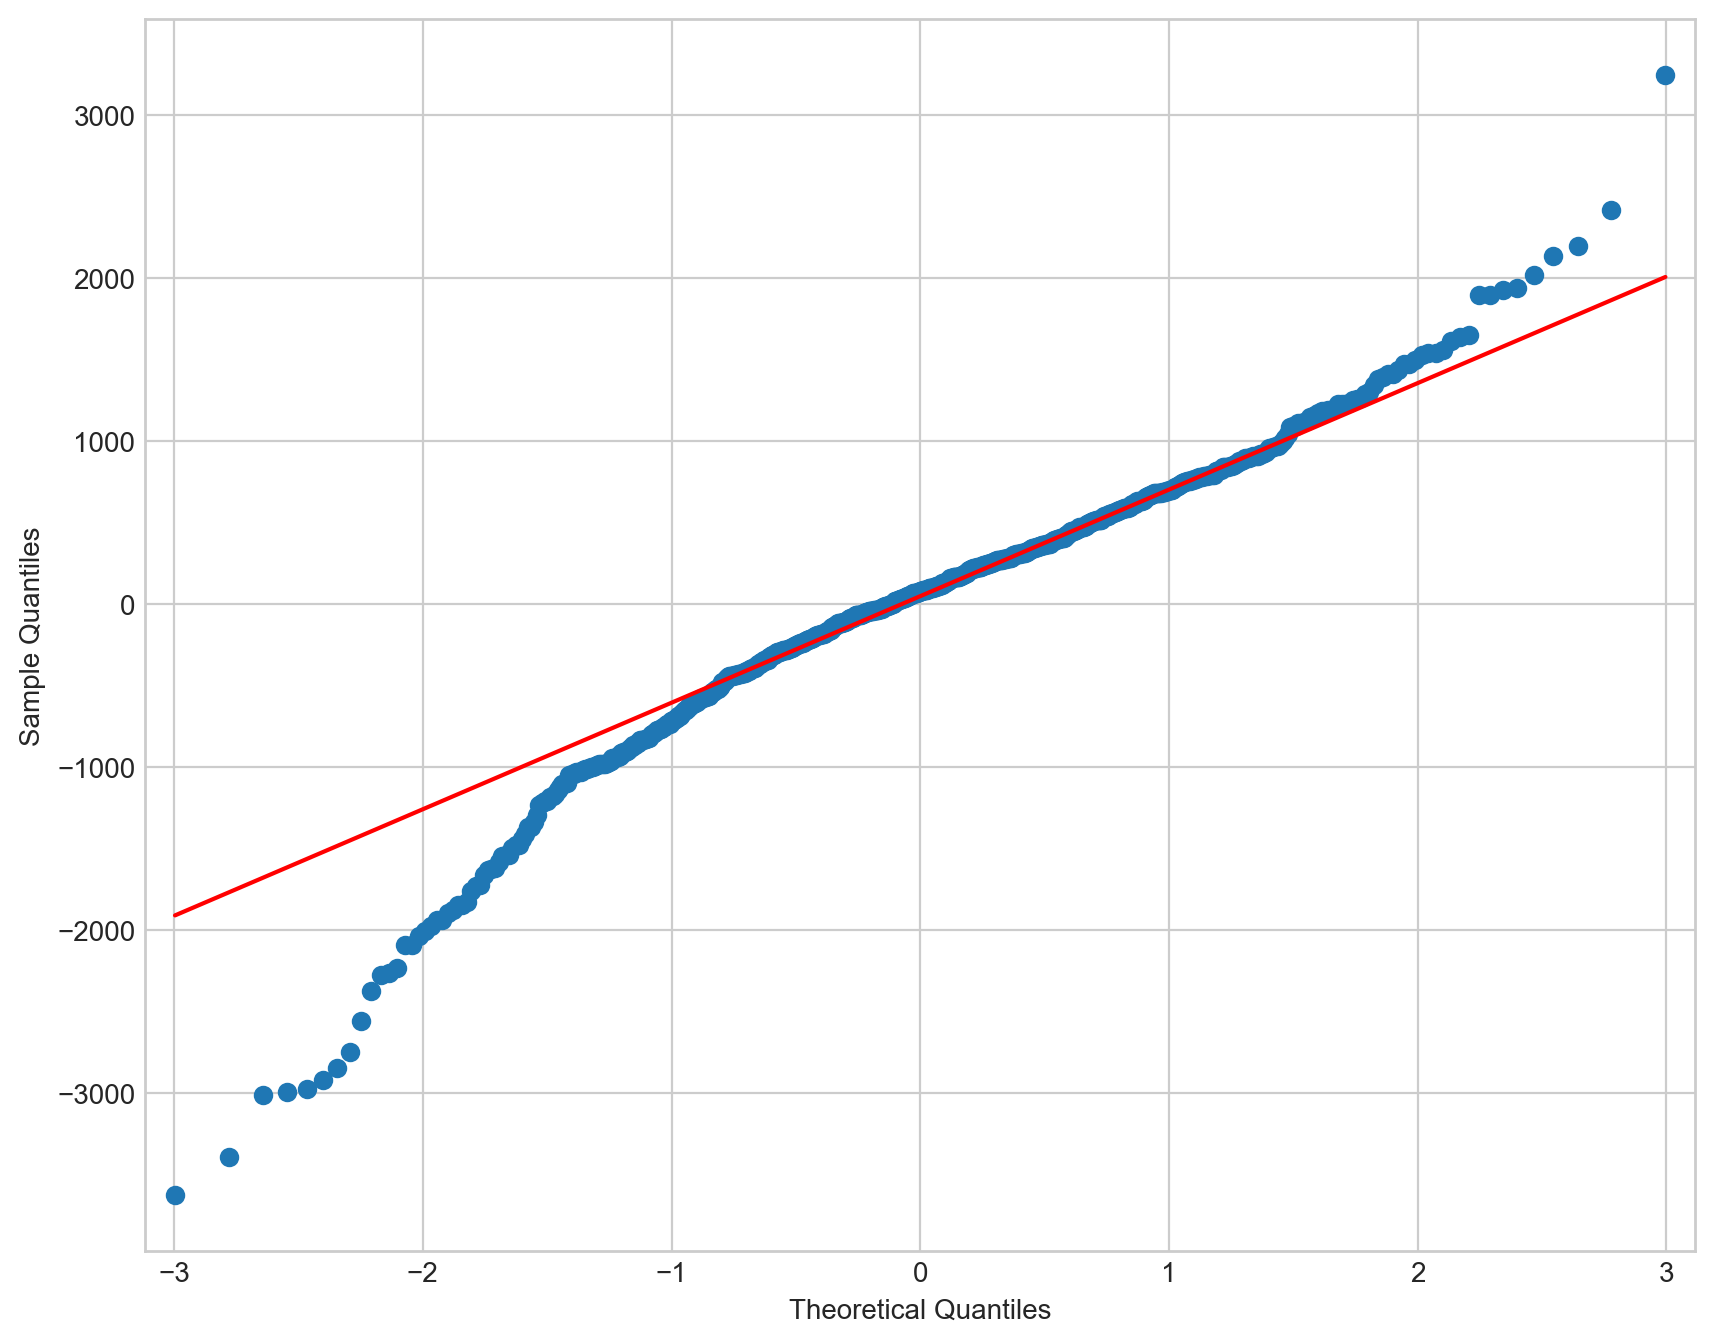

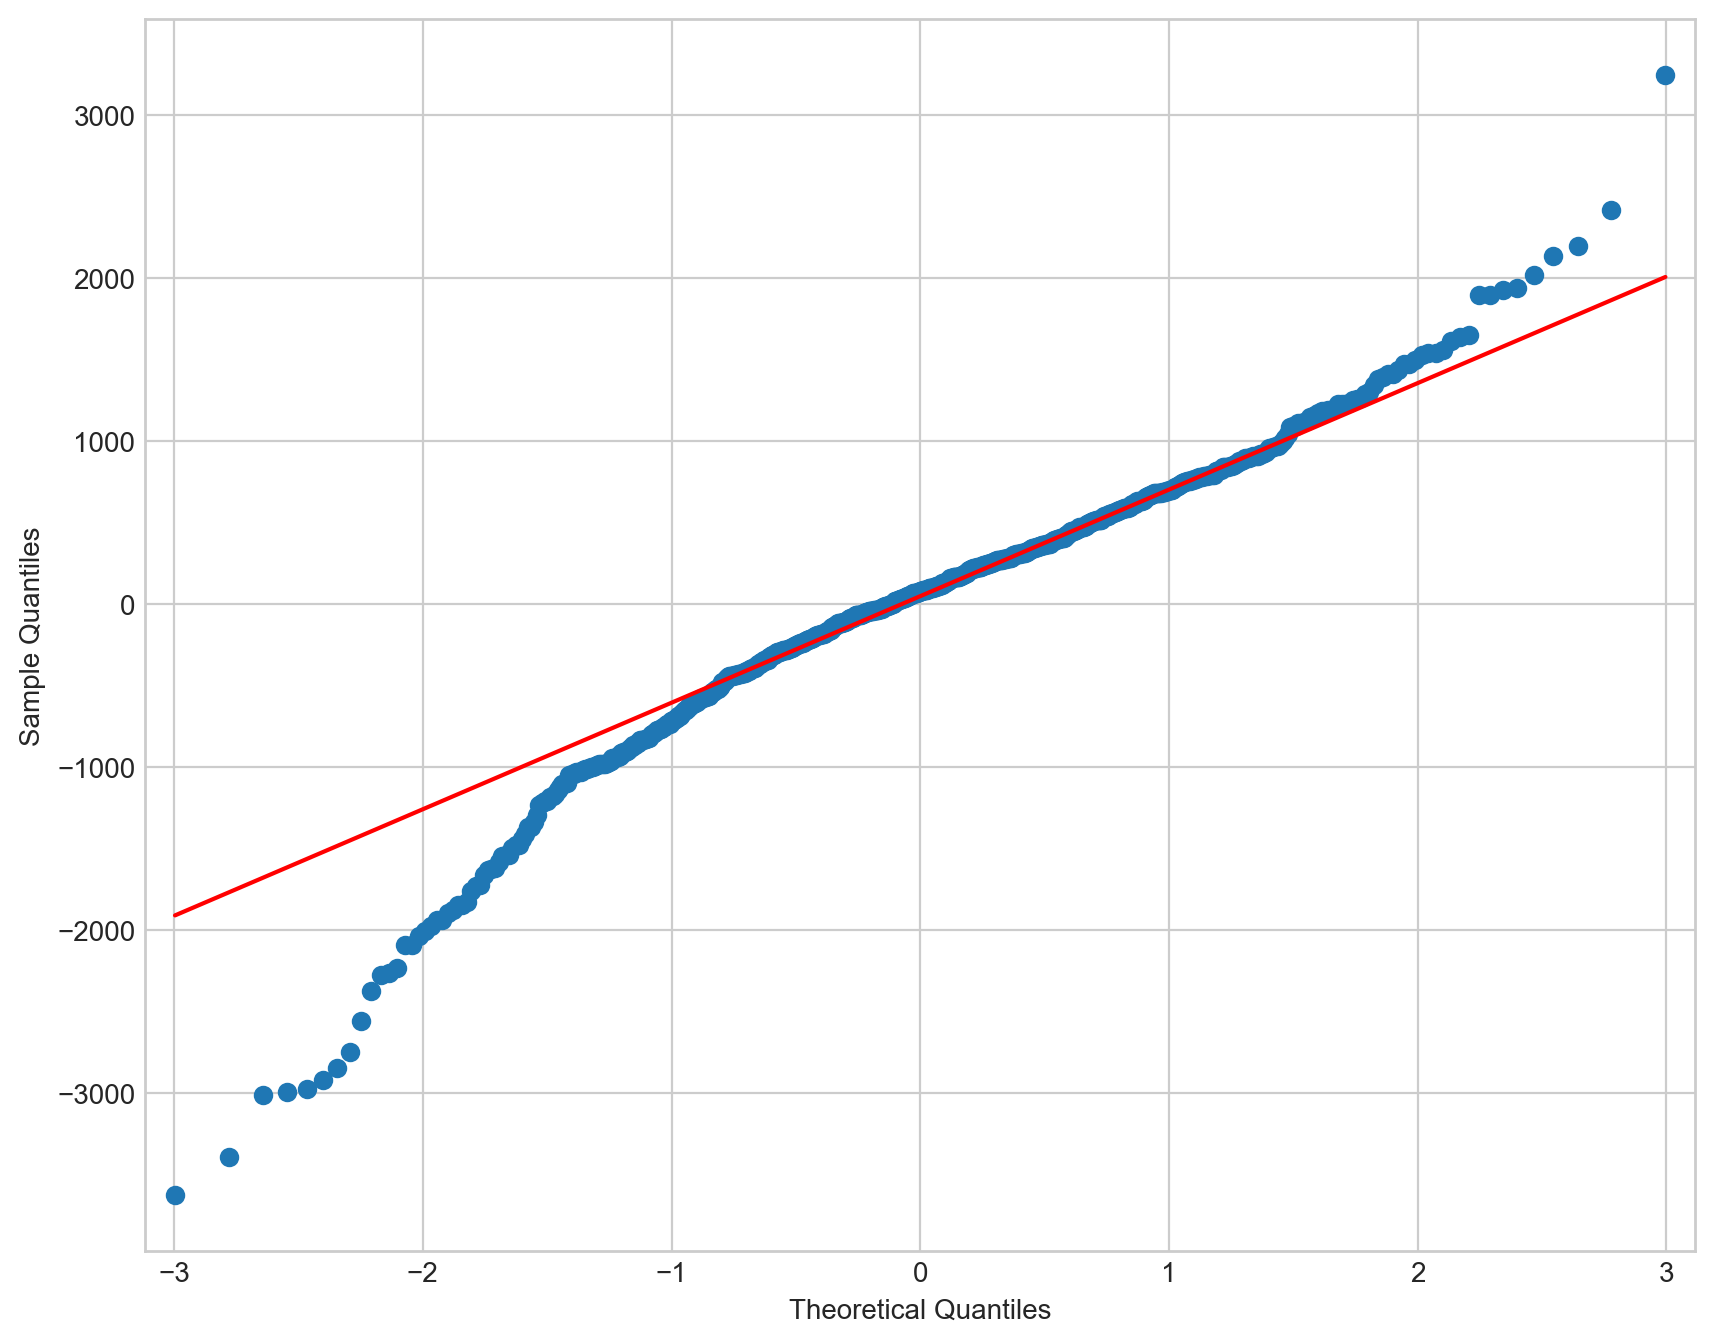

In [16]:
#procedemos a verificar el el supuesto de normalidad

## graficamente
sm.qqplot(ford_model.resid, line='q')

Observando el grafico, se puede ver que las colas son muy pesadas, por lo que no deberia pasar el supuesto de normalidad.

In [17]:
#procedemos a revisarlo numericamente

from scipy.stats import kstest

#test
#HO:EL modelo detribulle normal
#H1: el modelo distrubuye normal

ks_test= kstest(ford_model.resid, 'norm')

if ks_test.pvalue < 0.05:
    print(' Los residuos del modelo no siguien la hipotesis normalidad')
else:
    print('eLos residuos del modelo siguien la hipotesis nnormalidad')

 Los residuos del modelo no siguien la hipotesis normalidad


In [18]:
#continuamos con la independencia de los resuidos

#HO: los resuidos no estan auto correlacionados, sin independientes
#H1: los resuidos estan correlacionados, no son independientes
#Durbin-Watson:	1.082


Como el valor de durbin watson no esta dento de 1.8 y 2.2, es decir rechazmaos H0, los resuidos no son independientes.

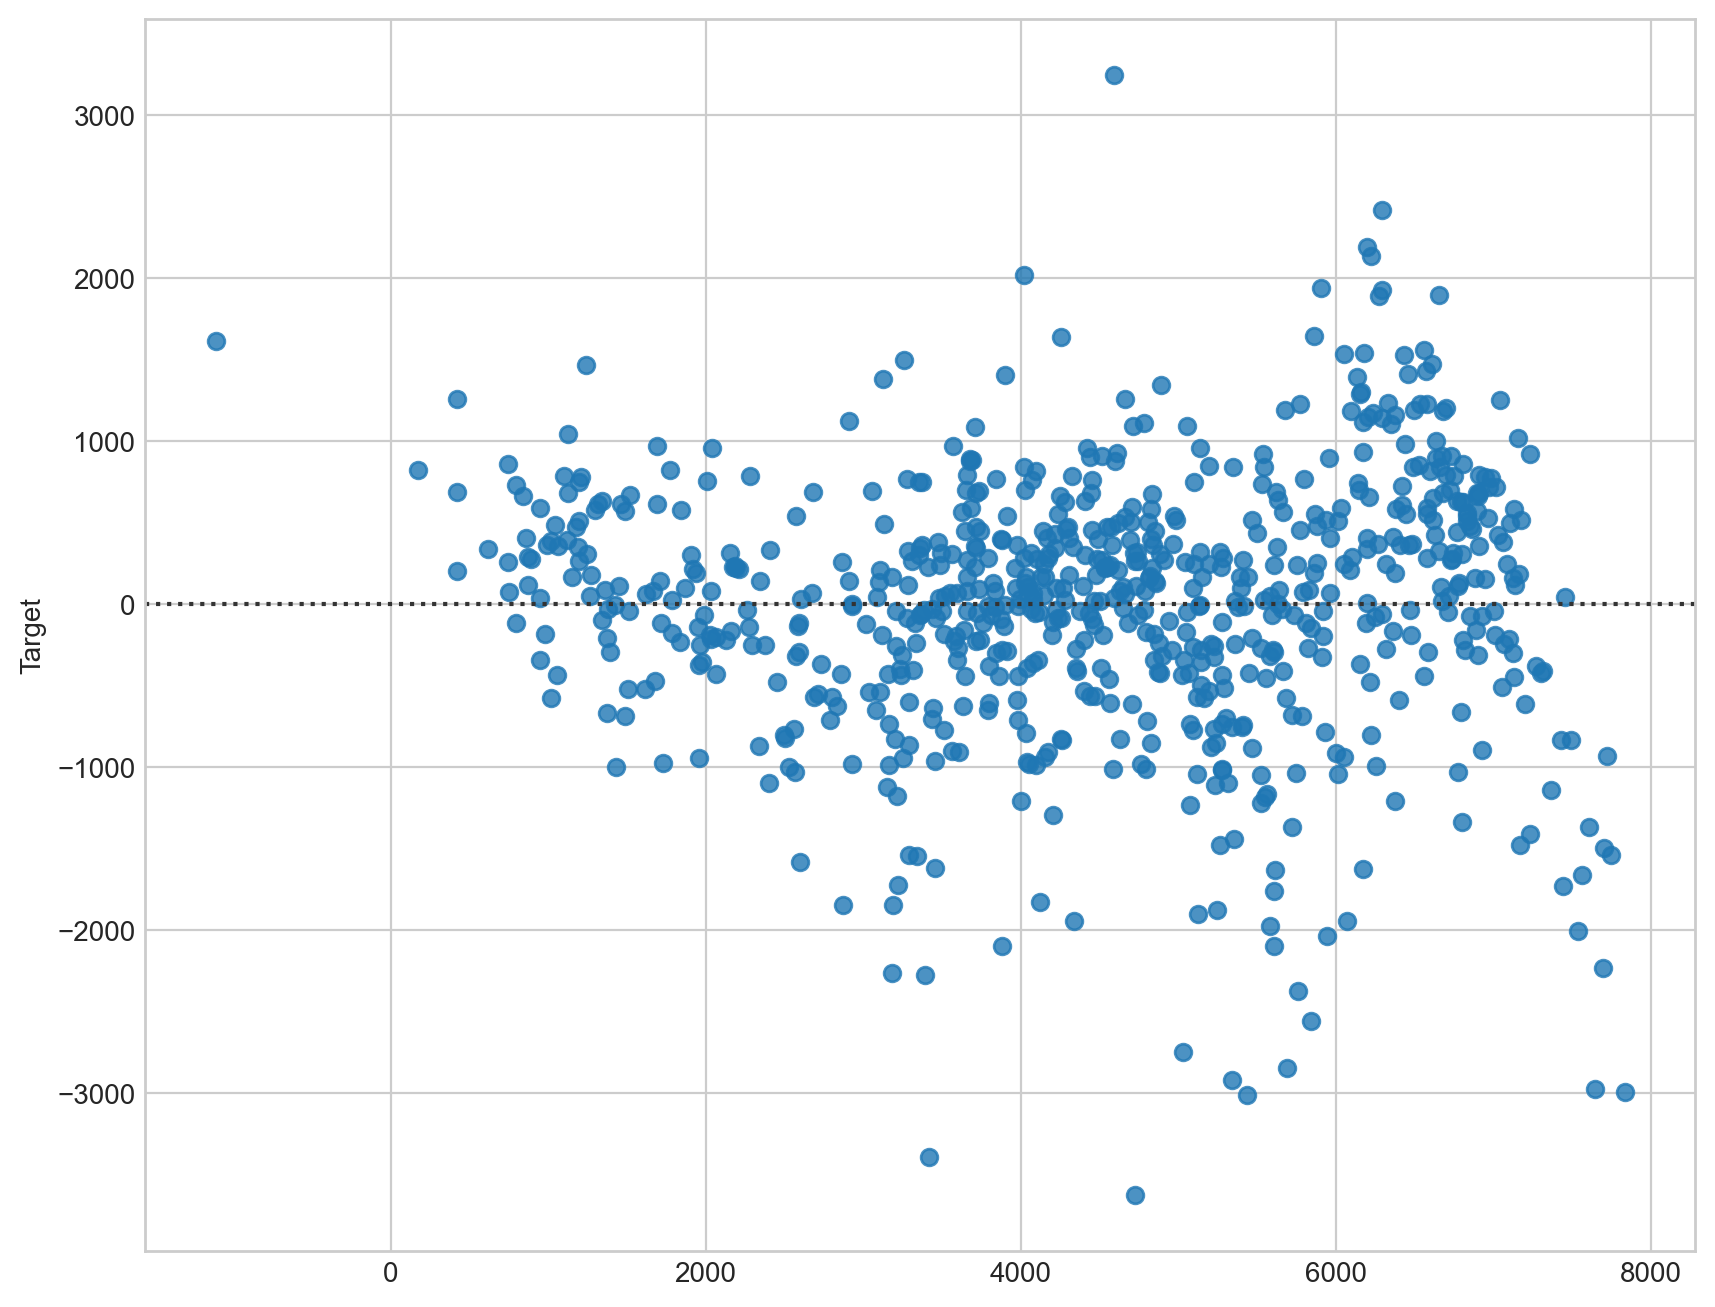

In [19]:
#ademas hacemos el grafico para validarlo

import seaborn as sns

plot= sns.residplot(x= ford_model.fittedvalues, y=y)

El revisar el grafico, no vemos una nube de puntos, por lo que podemos concluir que los residuos no son independientes.

In [20]:
#Procedemos hacer le modelo de la homoseasticidad. Test Breuch-Pagan

#HO= Homoeasticidad
#H1= Heteroceasticidad
import statsmodels.stats.api as sms

sms.het_breuschpagan(ford_model.resid, ford_model.model.exog)

(51.770281205383924,
 3.000471704718087e-07,
 4.981957858317921,
 1.691972850681301e-07)

Tomamos el segundo valor 3.000471704718087e-07, que es el de la homoceasticidad. Como el valor es menos 0.05, rechazamos H0), por lo que no se cumple el supuesto de homoceasticidad.

Pregunta 6

Realice una predicción de arriendos de bicicletas para un día con las siguientes cualidades:

import pandas as pd
pd.DataFrame({'season' : 2,
       'year' : 2021,
       'holiday' : 'feriado',
       'weekday' : 'Sábado',
       'workingday' : 'No laboral',
       'weather' : 'Niebla',
       'temp' : 12,
       'atemp' : 11,
       'humidity' : 66.3,
       'windspeed' : 12.5}, index = ['1'])


In [21]:
#tomamos las variable sdel modelo forward, para poder realizar la predicion
varibales_ford=ford_model.params.index

In [22]:
print(varibales_ford)

Index(['const', 'atemp', 'year_1', 'season_4', 'weather_3', 'weather_2',
       'season_2', 'season_3', 'windspeed', 'humidity', 'holiday_1', 'temp'],
      dtype='object')


In [23]:
import stepwise_regression

prediction=pd.DataFrame({'season' : 2, 
            'year_1' : 1,
            'holiday' : 1,
            'holiday_1':0,
            'weekday' : 6,
            'workingday' : 0, 
            'weather' : 2,
            'temp' : 12,
            'atemp' : 11, 
            'humidity' : 66.3,
            'windspeed' : 12.5,
            'const':1,
            'season_2':1,
            'season_3':0,
            'season_4':0,
            'weather_2':1, 
            'weather_3':0}, index = ['1'])

#variables_prediccion = prediction[ford_model]

In [24]:
variables_prediccion = prediction[varibales_ford]
display(variables_prediccion)

,const,atemp,year_1,season_4,weather_3,weather_2,season_2,season_3,windspeed,humidity,holiday_1,temp
1,1,11,1,0,0,1,1,0,12.5,66.3,0,12


In [25]:
y_prediccion= ford_model.predict(variables_prediccion)
print(y_prediccion)

1    5165.055545
dtype: float64


El resultado de la varible dependiente corresponde a 5165, lo que corresponde al target de biciletas con esa información.

Regresión logística
En un centro meteorológico, se contratan sus servicios como Data Scientist para construir un modelo que prediga si lloverá o no en las próximas 24 horas, utilizando información de las 24 horas previas. Se dispone de un conjunto de 19 variables meteorológicas. La descripción de las variables es la siguiente:

* **MinTemp** Temperatura mínima registrada.
* **MaxTemp** Temperatura máxima registrada.
* **Lluvia** Cantidad de lluvia registrada ese día en mm.
* **Evaporacion** Evaporación (mm) en 24 horas.
* **Sol** Número de horas de sol brillante en el día.
* **VelRafaga** La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
* **Vel9am** La velocidad (km/h) de la ráfaga de viento a las 9am.
* **Vel3pm** La velocidad (km/h) de la ráfaga de viento a las 9am.
* **Hum9am** Porcentaje de humedad a las 9am.
* **Hum3pm** Porcentaje de humedad a las 3pm.
* **Pres9am** Presión atmosférica (hpa) a nivel del mar a las 9am.
* **Pre3pm** Presión atmosférica (hpa) a nivel del mar a las 3pm.
* **Nub9am** Fracción del cielo cubierto por nubes a las 9am. Se mide en “octavos”, de manera que un valor 0 indica cielo. totalmente despejado y 8, cielo totalmente cubierto.
* **Nub3pm** Fracción del cielo cubierto por nubes a las 3pm. Se mide en “octavos”, de manera que un valor 0 indica cielo. totalmente despejado y 8, cielo totalmente cubierto.
* **Temp9am** Temperatura en grados celsius a las 9am.
* **Temp3pm** Temperatura en grados celsius a las 3pm.
* **LluviaHoy** Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 horas. excede 1 mm. y 0, si no.
* **Koppen** Clasificación Koppen de la zona de medición (Temperate, Subtropical, Grassland, Tropical, Desert).
* **Estación** Estación del Año.
* **LluviaMan** Indicador de lluvia al día siguiente de la medición.

Pregunta 7

Cargue la base de datos Lluvia_full.csv, codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente. Además, realice una separación de la base de datos en un set de entrenamiento y set de validación. Utilice una proporción de 80:20 respectivamente. Para poder replicar sus resultados, fije una semilla antes de obtener los indices. Para ello utilice la función random.seed(2023).

In [26]:
#procedemos a cargar la base de datos y revisamos su información
lluvia=pd.read_csv('Lluvia_full.csv')

lluvia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  object 
 18  Koppen       56420 non-null  object 
 19  Esta

In [27]:
lluvia.isnull().sum()

MinTemp        0
MaxTemp        0
Lluvia         0
Evaporacion    0
Sol            0
VelRafaga      0
Vel9am         0
Vel3pm         0
Hum9am         0
Hum3pm         0
Pres9am        0
Pre3pm         0
Nub9am         0
Nub3pm         0
Temp9am        0
Temp3pm        0
LluviaHoy      0
LluviaMan      0
Koppen         0
Estacion       0
dtype: int64

In [28]:
display(lluvia.head())

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno


In [29]:
#procedemos a remapear la informaicon de lluviaman con 0 y 1 
lluvia['LluviaMan']=lluvia['LluviaMan'].map({'Yes':1, 'No':0})
display(lluvia.head())

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,0,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,0,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,0,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,1,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,0,Temperate,Invierno


In [30]:
lluvia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  int64  
 18  Koppen       56420 non-null  object 
 19  Esta

In [31]:
#procedemos a separar la base de datos para poder entrenarlo y luego testearlo. Ademas generamos una semilla(2023), para que estas puedan se lo mismo en los dos casos.

from sklearn.model_selection import train_test_split

x = lluvia.drop(['LluviaMan'],axis=1)
y = lluvia['LluviaMan']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2023)


In [32]:
display(x_train.head())
display(x_test.head())

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,Koppen,Estacion
31665,17.2,32.8,0.0,12.6,13.4,54.0,22.0,20.0,50.0,33.0,1012.6,1008.8,1.0,2.0,20.4,31.2,No,Temperate,Verano
36405,8.7,13.8,4.4,0.2,3.2,44.0,13.0,22.0,99.0,65.0,1010.2,1012.1,7.0,6.0,10.8,13.1,Yes,Temperate,Otoño
35309,4.3,16.6,0.0,2.4,9.4,24.0,7.0,9.0,65.0,38.0,1023.0,1020.7,3.0,2.0,11.3,16.5,No,Temperate,Invierno
24159,11.1,18.5,1.0,2.8,1.4,52.0,11.0,31.0,93.0,52.0,1019.4,1020.2,8.0,7.0,13.3,16.5,No,Temperate,Otoño
27018,10.2,15.1,14.8,6.8,5.2,67.0,15.0,37.0,74.0,45.0,1010.6,1013.6,7.0,7.0,12.5,13.0,Yes,Subtropical,Primavera


,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,Koppen,Estacion
14215,19.6,29.6,0.0,10.6,11.1,41.0,24.0,22.0,58.0,46.0,1016.7,1013.7,4.0,2.0,25.5,27.7,No,Temperate,Primavera
35351,8.6,11.2,2.0,0.0,0.0,54.0,30.0,30.0,83.0,75.0,1027.7,1026.8,7.0,7.0,10.3,10.9,Yes,Temperate,Invierno
40305,6.7,16.2,0.8,3.4,6.0,46.0,22.0,28.0,76.0,66.0,1021.8,1022.8,7.0,7.0,11.8,14.1,No,Temperate,Primavera
27060,7.1,26.3,0.0,8.0,9.8,43.0,31.0,15.0,22.0,12.0,1019.2,1013.9,0.0,0.0,18.0,24.9,No,Desert,Primavera
17976,21.0,26.7,0.0,11.8,6.7,43.0,26.0,28.0,58.0,47.0,1015.5,1013.3,8.0,5.0,22.3,25.9,No,Subtropical,Otoño


Pregunta 8

Realice un modelo de regresión logística para predecir si lloverá mañana utilizando la variable Evaporación, ¿es este Un factor significativo? Intérprete el odd ratio de la evaporación.

In [33]:
#segun varibale Evaporacion
varibales_seleccionadas=x_train[['Evaporacion']]

x_train_nuevo = pd.get_dummies(varibales_seleccionadas, drop_first=True, dtype=int)

x_train_nuevo = sm.add_constant(x_train_nuevo)

display(x_train_nuevo.head())
display(x_train.head())

,const,Evaporacion
31665,1.0,12.6
36405,1.0,0.2
35309,1.0,2.4
24159,1.0,2.8
27018,1.0,6.8


,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,Koppen,Estacion
31665,17.2,32.8,0.0,12.6,13.4,54.0,22.0,20.0,50.0,33.0,1012.6,1008.8,1.0,2.0,20.4,31.2,No,Temperate,Verano
36405,8.7,13.8,4.4,0.2,3.2,44.0,13.0,22.0,99.0,65.0,1010.2,1012.1,7.0,6.0,10.8,13.1,Yes,Temperate,Otoño
35309,4.3,16.6,0.0,2.4,9.4,24.0,7.0,9.0,65.0,38.0,1023.0,1020.7,3.0,2.0,11.3,16.5,No,Temperate,Invierno
24159,11.1,18.5,1.0,2.8,1.4,52.0,11.0,31.0,93.0,52.0,1019.4,1020.2,8.0,7.0,13.3,16.5,No,Temperate,Otoño
27018,10.2,15.1,14.8,6.8,5.2,67.0,15.0,37.0,74.0,45.0,1010.6,1013.6,7.0,7.0,12.5,13.0,Yes,Subtropical,Primavera


In [34]:
model_logistica= sm.Logit(y_train,x_train_nuevo).fit()

Optimization terminated successfully.
         Current function value: 0.518724
         Iterations 6


In [35]:
model_logistica.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LluviaMan   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45134
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                 0.01814
Time:                        23:10:22   Log-Likelihood:                -23413.
converged:                       True   LL-Null:                       -23846.
Covariance Type:            nonrobust   LLR p-value:                3.527e-190
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7298      0.021    -34.448      0.000      -0.771      -0.688
Evaporacion    -0.1030      0.004    -27.765      0.000      -0.110      -0.096
===============================================================================
"""

In [36]:
modelo_logistica=model_logistica.params[1:]

In [37]:
#procedemos a ver los coeficientes del modelo de regresion logisticas. Sabemos que si b > 0 es agravante y b<0 es protector.

#como b<0 se puede decir que es un protector

#procedemos a ver el Odd's Raitos

pd.DataFrame(round(np.exp(modelo_logistica),2))



,0
Evaporacion,0.9


Por cada aumento de unidad de evaporaicon se puede decir se ajusta a un 0.9. Por lo que se puede decir que este es un factor protector para la lluvia del dia de mañana. obs: tomando que todas las variables que estan en el modelo son constantes.

Pregunta 9

Utilizando un método automatizado, ajuste un modelo de regresión logística, utilizando la metodología de dirección both (forward y backward a la vez).

In [38]:
%pip install estyp -U

Note: you may need to restart the kernel to use updated packages.


In [39]:
from estyp.linear_model import LogisticRegression
from estyp.linear_model.stepwise import both_selection
from warnings import filterwarnings
filterwarnings("ignore")


Made by Esteban Rucán. Contact me in LinkedIn: https://www.linkedin.com/in/estebanrucan/


In [40]:
lluvia_train=pd.concat([x_train, y_train], axis=1)
formula= 'LluviaMan ~ ' + ' + '.join(x_train.columns)

In [41]:
#procedeemos a utilizar el both selection
formula_Resultante = both_selection(formula=formula, data=lluvia_train, model= LogisticRegression)

/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/raimundoschulzehot/miniconda3/envs/diplomado/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [42]:
formula_Resultante

'LluviaMan ~ MinTemp + MaxTemp + Lluvia + Evaporacion + Sol + VelRafaga + Vel9am + Vel3pm + Hum9am + Hum3pm + Pres9am + Pre3pm + Nub9am + Nub3pm + Temp3pm + LluviaHoy + Koppen + Estacion'

In [43]:
#procedemos a realisar la regrecion logistica, segun la fomrula enrregada en la seleccion both
import statsmodels.formula.api as smf

modelos_regrecionlog= smf.logit(formula_Resultante, data= lluvia_train).fit()

Optimization terminated successfully.
         Current function value: 0.332973
         Iterations 7


In [44]:
modelos_regrecionlog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LluviaMan   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45113
Method:                           MLE   Df Model:                           22
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                  0.3697
Time:                        23:11:19   Log-Likelihood:                -15029.
converged:                       True   LL-Null:                       -23846.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                63.1688      2.823     22.376      0.000      57.636      68.702
LluviaHoy[T.Yes]          0.4644      0.041     11.447      0.000       0.385       0.544
Koppen[T.Grassland]      -0.0091      0.150     -0.061      0.951      -0.302       0.284
Koppen[T.Subtropical]     0.4526      0.135      3.343      0.001       0.187       0.718
Koppen[T.Temperate]       0.0450      0.135      0.334      0.738      -0.219       0.309
Estacion[T.Otoño]         0.0251      0.045      0.556      0.578      -0.063       0.113
Estacion[T.Primavera]     0.0653      0.046      1.406      0.160      -0.026       0.156
Estacion[T.Verano]       -0.2229      0.056     -3.949      0.000      -0.334      -0.112
MinTemp                  -0.0414      0.006     -6.591      0.000      -0.054      -0.029
MaxTemp                   0.0144      0.013      1.103      0.270      -0.011       0.040
Lluvia                    0.0095      0.002      4.033      0.000       0.005       0.014
Evaporacion               0.0023      0.007      0.350      0.726      -0.011       0.015
Sol                      -0.1475      0.007    -21.309      0.000      -0.161      -0.134
VelRafaga                 0.0589      0.002     33.222      0.000       0.055       0.062
Vel9am                   -0.0145      0.002     -6.165      0.000      -0.019      -0.010
Vel3pm                   -0.0227      0.002     -9.335      0.000      -0.027      -0.018
Hum9am                    0.0019      0.001      1.331      0.183      -0.001       0.005
Hum3pm                    0.0586      0.002     35.215      0.000       0.055       0.062
Pres9am                   0.1118      0.009     12.072      0.000       0.094       0.130
Pre3pm                   -0.1811      0.009    -19.559      0.000      -0.199      -0.163
Nub9am                   -0.0162      0.008     -1.908      0.056      -0.033       0.000
Nub3pm                    0.1325      0.009     14.313      0.000       0.114       0.151
Temp3pm                   0.0352      0.015      2.404      0.016       0.007       0.064
=========================================================================================
"""

Pregunta 10
Considerando la base de entrenamiento, ajuste la curva ROC y KS asociada al modelo, ¿Qué puede concluir sobre la discriminación del modelo?. Con la información obtenida encuentre un punto de corte que tenga una sensibilidad mínima del 80% y la máxima especificidad.

In [45]:
from sklearn.metrics import roc_curve

y_pred = modelos_regrecionlog.predict(x_train)

fpr, tpr, thresholds= roc_curve(y_train, y_pred)

resume_lluvia_pred= pd.DataFrame({'Falso Positivos':fpr,
                                'Verdaderos Positivos': tpr,
                                'Umbral':thresholds})

resume_lluvia_pred

,Falso Positivos,Verdaderos Positivos,Umbral
0,0.000000,0.000000,inf
1,0.000000,0.000100,0.999367
2,0.000000,0.007916,0.987605
3,0.000028,0.007916,0.987468
4,0.000028,0.009519,0.986493
...,...,...,...
9325,0.976306,0.999800,0.005455
9326,0.976306,0.999900,0.005447
9327,0.982507,0.999900,0.004858
9328,0.982507,1.000000,0.004857


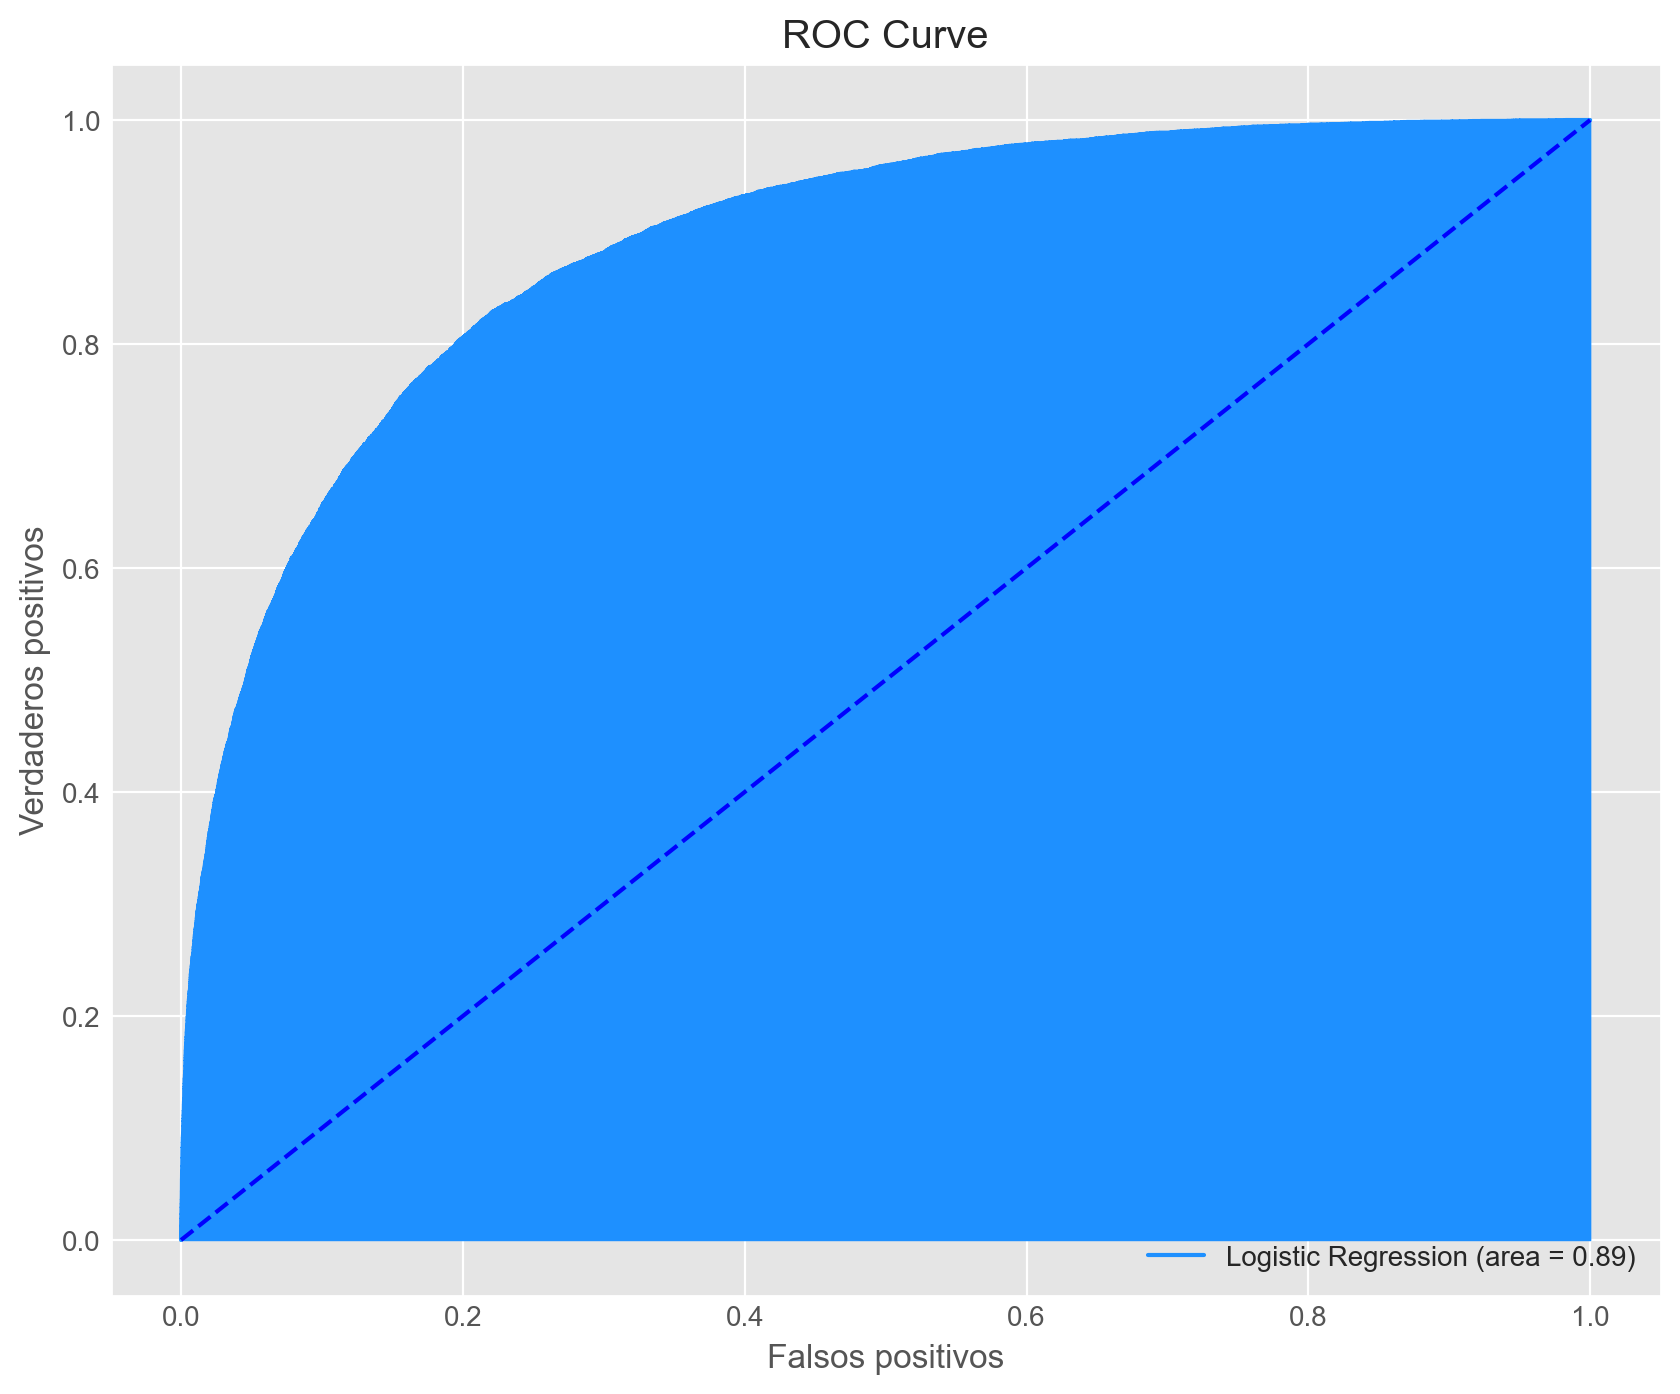

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.style.use('ggplot')
# ROC curve
logit_roc_auc = roc_auc_score(y_train, y_pred)
fpr, tpr, thresholds = roc_curve(y_train, y_pred) # entrega 3 array
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, color = 'dodgerblue')
# extra para que se vea "bien"
plt.fill_between(fpr, tpr, color='dodgerblue')
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show();

Como conclusion del modelo, podemos decir que el area sobre la curva corresponde a un 0.89, viendo que en el caso de entrenamiento del modelo se tiene una acertividad de 89% de los casos. Por lo que el modelo funciona mejor que al azar.

In [47]:
#obteniendo esta informacion, procedemos a buscar el punto de corte que tenga una sensibilidad minima del 0.8.
resume_lluvia_pred[resume_lluvia_pred['Falso Positivos']<=0.2]

,Falso Positivos,Verdaderos Positivos,Umbral
0,0.000000,0.000000,inf
1,0.000000,0.000100,0.999367
2,0.000000,0.007916,0.987605
3,0.000028,0.007916,0.987468
4,0.000028,0.009519,0.986493
...,...,...,...
5908,0.199653,0.805210,0.209085
5909,0.199738,0.805210,0.209029
5910,0.199738,0.805311,0.209003
5911,0.199795,0.805311,0.208977


In [48]:
#Con esto podemos decir que el punto de corte corresponde a lo siguiente.
punto_de_corte = 0.208974

In [49]:
#procedemos a realizar la matriz de confusion
from sklearn.metrics import confusion_matrix

y_pred_entre_test = (y_pred > punto_de_corte).astype(int)

confusion_entre = confusion_matrix(y_train, y_pred_entre_test, labels = [0, 1])

In [50]:
confusion_entre

array([[28132,  7024],
       [ 1942,  8038]])

In [51]:
TP_entr = confusion_entre[1, 1] # verdaderos positivos
TN_entr = confusion_entre[0, 0] # verdaderos negativos
FP_entr = confusion_entre[0, 1]
FN_entr = confusion_entre[1, 0]

In [52]:
sensibilidad_entr = TP_entr /(TP_entr + FN_entr) # nos va a importar cuando queramos clasificar bien los 1's
#FN -> clasifique como 0's pero en realidad eran 1's
print('Sensibilidad Entreamiento: ', sensibilidad_entr)
especificidad_entr = TN_entr/(TN_entr + FP_entr) # nos va a importar cuando queramos clasificar bien los 0's
#FP -> clasifique como 1's pero en realidad eran 0's
print('Especificidad Entrenamiento:', especificidad_entr)
precision_entr = TP_entr/(TP_entr + FP_entr)
print('Precision Entrenamiento: ', precision_entr)
recall_entr = TP_entr/(TP_entr + FN_entr)
# F1 = 2*(precision*recall)/(precision + recall)
F1_entr = 2*(precision_entr*recall_entr)/(precision_entr + recall_entr)
print('F1 Score Entrenamiento ', F1_entr)
auc_entr = (TP_entr + TN_entr)/(TP_entr + TN_entr + FP_entr + FN_entr) #exactitud
print('AUC Score Entrenamiento: ', auc_entr)

Sensibilidad Entreamiento:  0.8054108216432866
Especificidad Entrenamiento: 0.800204801456366
Precision Entrenamiento:  0.5336608684105697
F1 Score Entrenamiento  0.6419615046721507
AUC Score Entrenamiento:  0.8013559021623538


Con el punto de corte seleccionado anteriormente, obtenemos una sensibilidad del 0.8054 lo cual se encuentra dentro rango mencionado. Lo cual nos da una especificidad maxima del 0.8002, lo que quiere decir que el 80% de las instancias negativas se clasificaron como negativas.

In [53]:
y_pred_entre_2= np.array(pd.concat([1-y_pred, y_pred],axis=1))

In [54]:
%pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

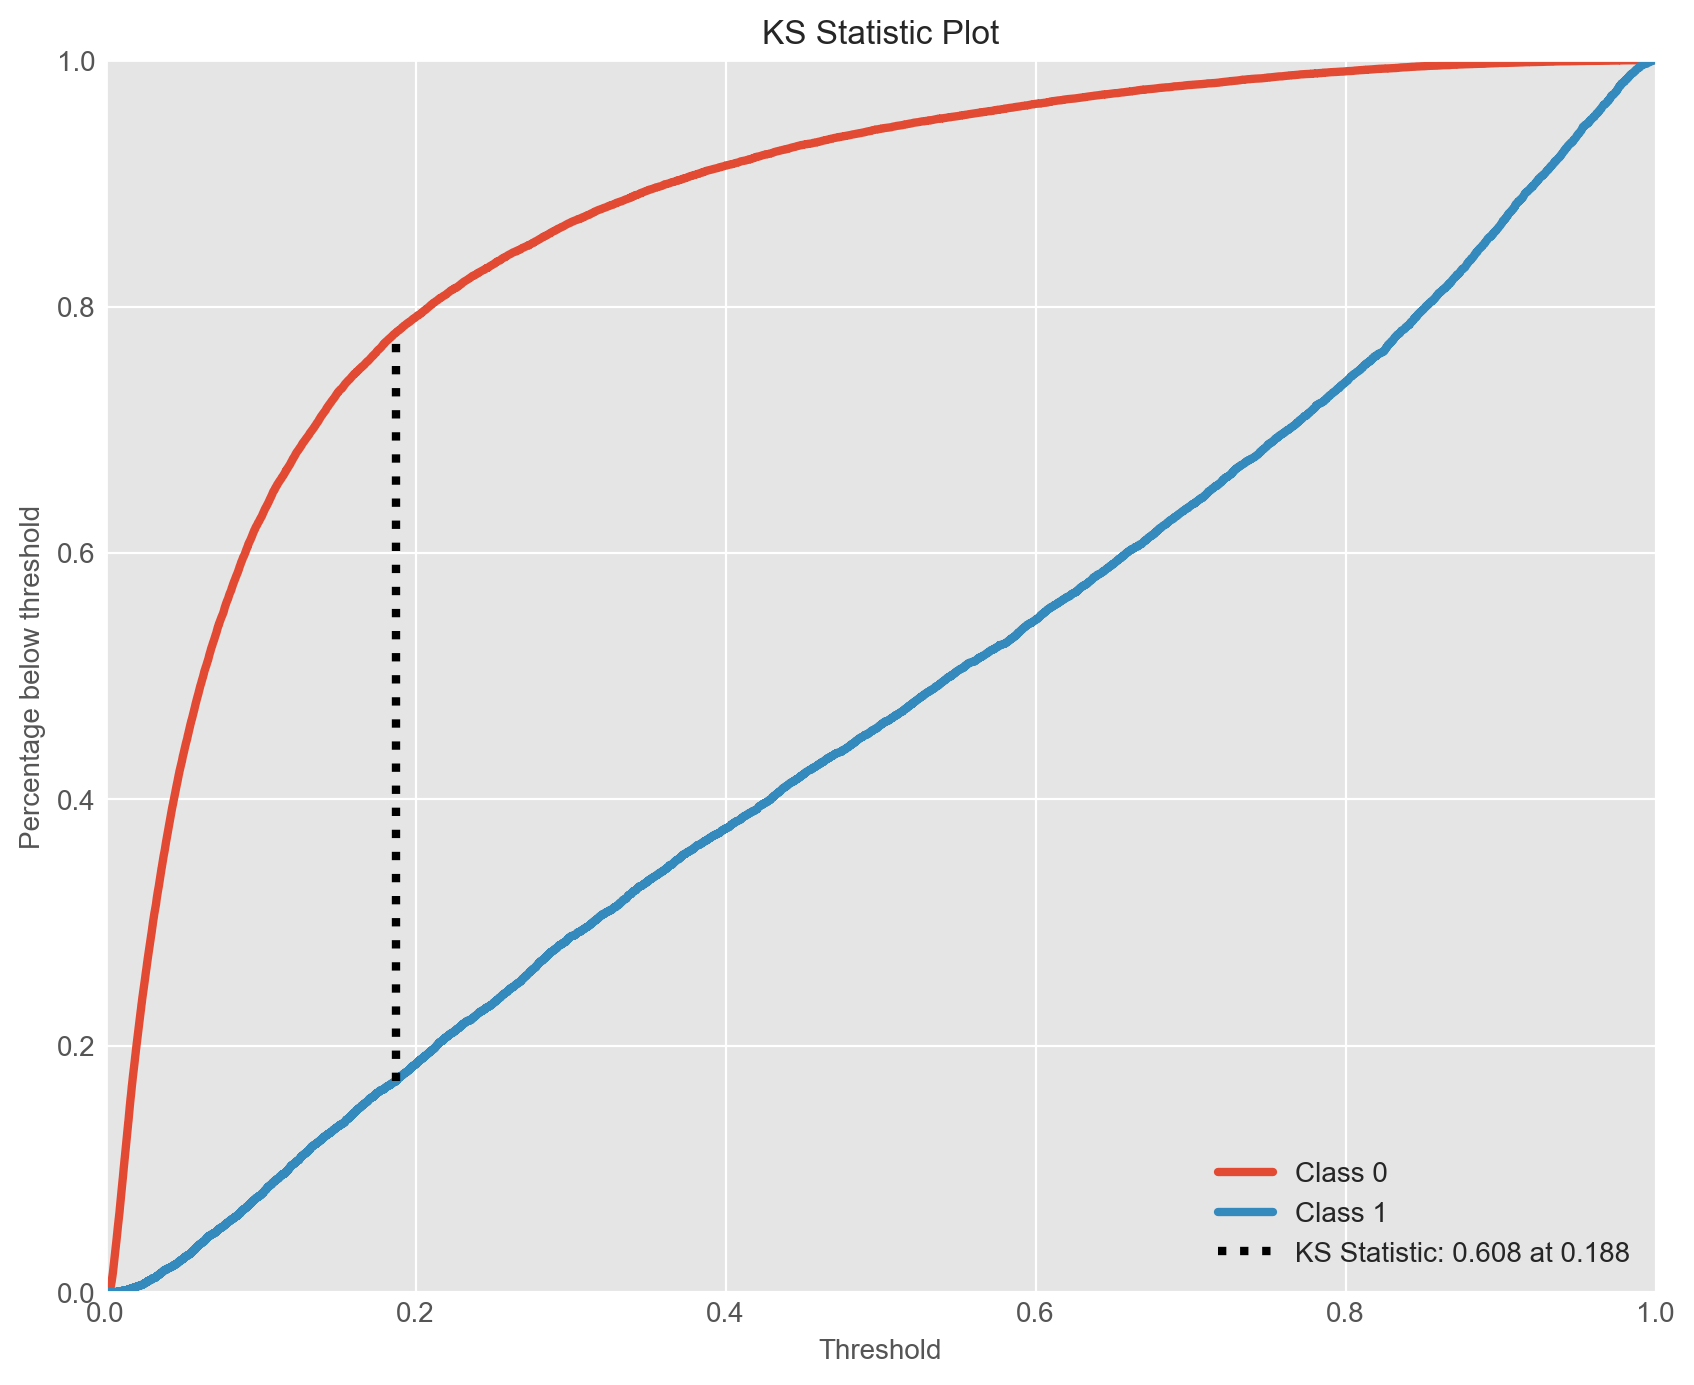

In [55]:
import scikitplot.metrics as skplt
#procedemos a rela

#ho: distribucion empirica es similar a la teorica
#h1: si la distribucion empirica no es similar  a la teorica

skplt.plot_ks_statistic(y_train, y_pred_entre_2)


H0=Desitribucion empirica igual a le teorica

H1=Distribucion empirica no es igual a la teorica

Como nuestro valor del ks test es 0.608 y es mayor a 0,05, no rechazamos H0. Decimos que la distribucion empirica es similar a la teorica.

In [56]:

from mletrics.classification import ks
ks(y_train,y_pred)

ModuleNotFoundError: No module named 'mletrics'

Pregunta 11
Considerando la base de test, obtenga nuevamente la curva ROC y KS asociada al modelo, ¿cómo han variado los indicadores?, además, utilizando el punto de corte obtenido, obtenga la precisión.

In [57]:
y_pred_test = modelos_regrecionlog.predict(x_test)

fpr_test, tpr_test, thresholds_test= roc_curve(y_test, y_pred_test)

resume_lluvia_pred_test= pd.DataFrame({'Falso Positivos':fpr_test,
                                'Verdaderos Positivos': tpr_test,
                                'Umbral':thresholds_test})

resume_lluvia_pred_test


,Falso Positivos,Verdaderos Positivos,Umbral
0,0.000000,0.000000,inf
1,0.000000,0.000409,0.998919
2,0.000000,0.006539,0.993138
3,0.000113,0.006539,0.993122
4,0.000113,0.008582,0.990742
...,...,...,...
2305,0.937083,0.999183,0.008932
2306,0.937083,0.999591,0.008932
2307,0.943193,0.999591,0.008394
2308,0.943193,1.000000,0.008386


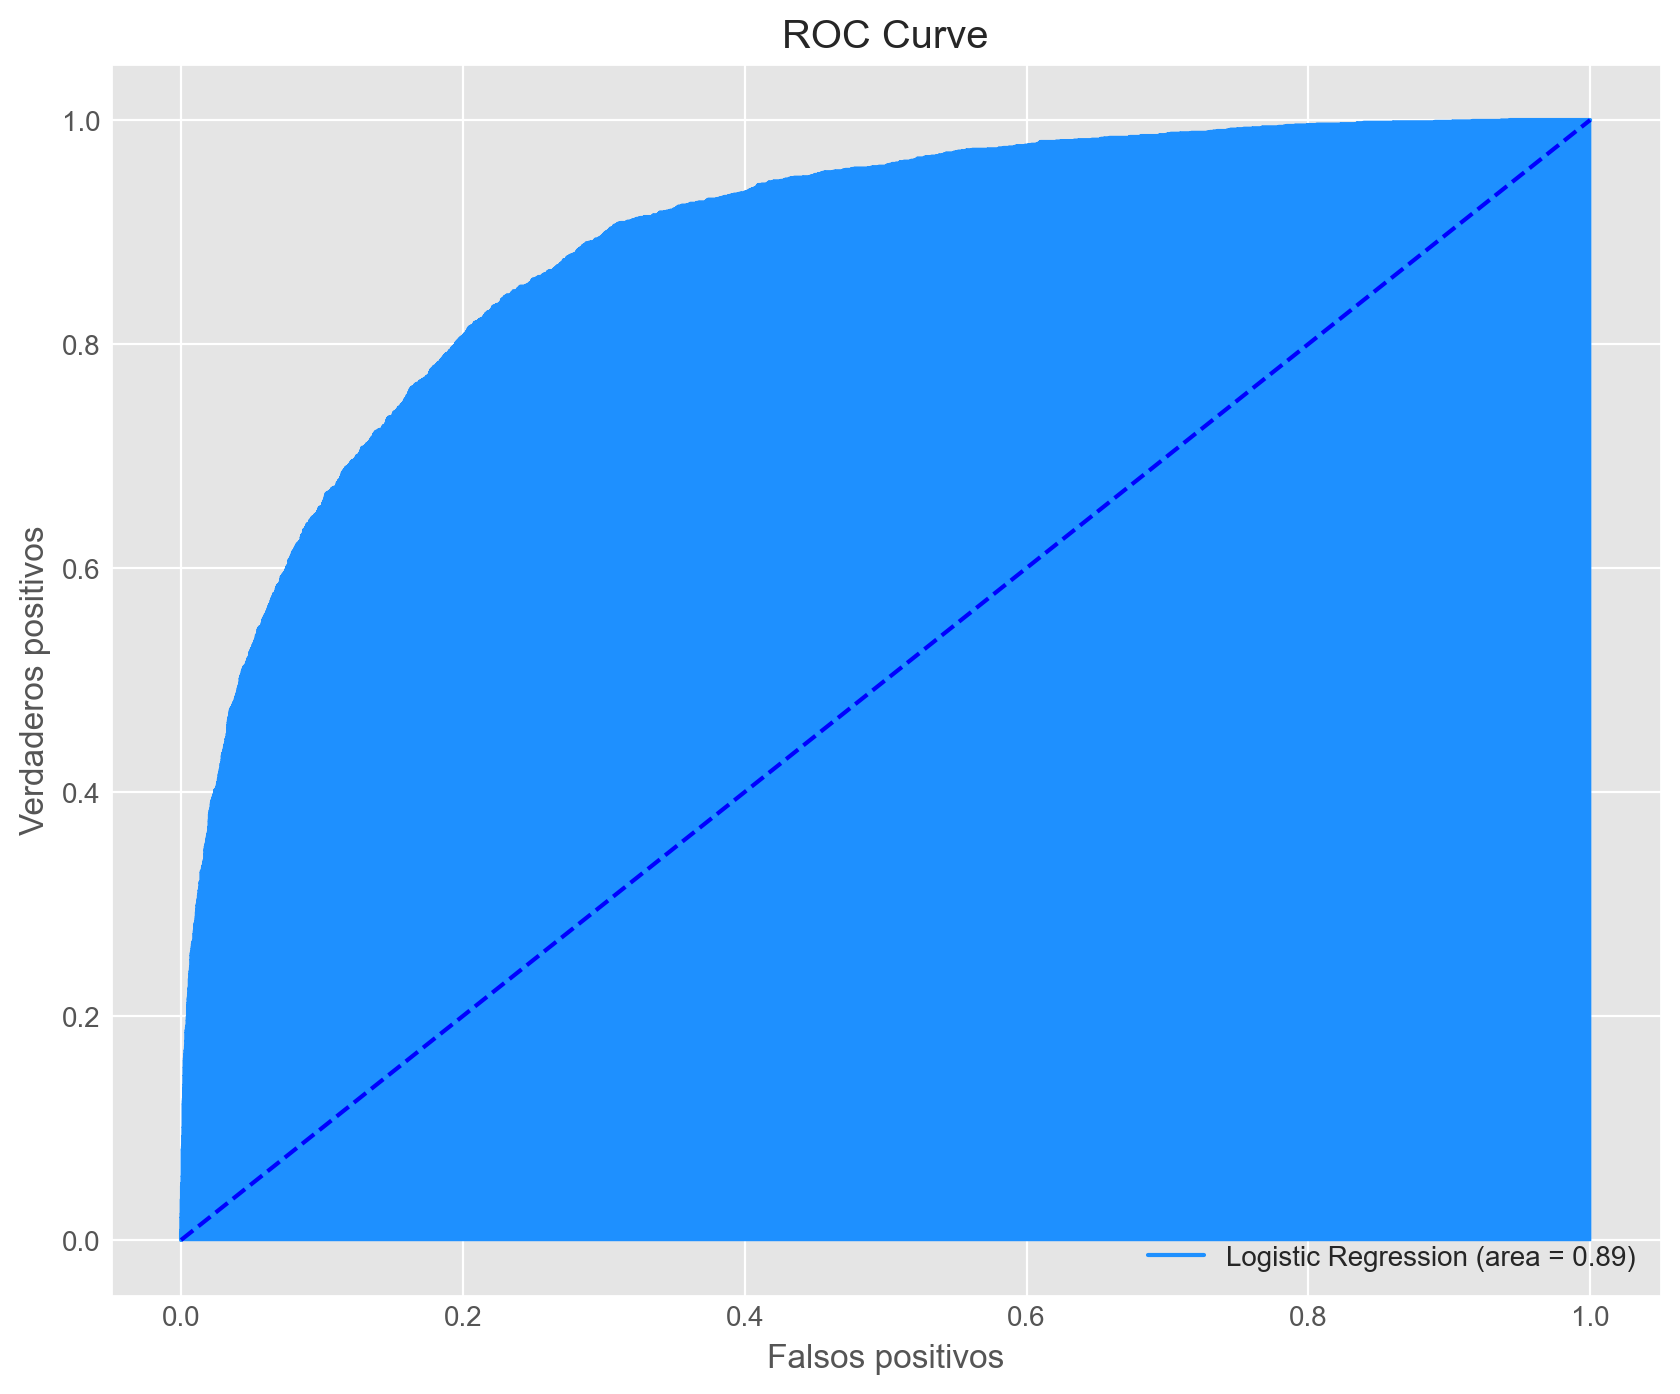

In [58]:
plt.style.use('ggplot')
# ROC curve
logit_roc_auc_test = roc_auc_score(y_test, y_pred_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test) # entrega 3 array
plt.figure()
plt.plot(fpr_test, tpr_test, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test, color = 'dodgerblue')
# extra para que se vea "bien"
plt.fill_between(fpr_test, tpr_test, color='dodgerblue')
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show();

Respcto a la curva ROC podemos decir que la informaicon obtenida se mantiene, es decir el modelo se tiene una acertividad de 89% de los casos.

In [59]:
y_pred_test1 = (y_pred_test > punto_de_corte).astype(int)

confusion_test = confusion_matrix(y_test, y_pred_test1, labels = [0, 1])

In [60]:
TP = confusion_test[1, 1] # verdaderos positivos
TN = confusion_test[0, 0] # verdaderos negativos
FP = confusion_test[0, 1]
FN = confusion_test[1, 0]

In [61]:
sensibilidad = TP /(TP + FN) # nos va a importar cuando queramos clasificar bien los 1's
#FN -> clasifique como 0's pero en realidad eran 1's
print('Sensibilidad: ', sensibilidad)
especificidad = TN/(TN + FP) # nos va a importar cuando queramos clasificar bien los 0's
#FP -> clasifique como 1's pero en realidad eran 0's
print('Especificidad: ', especificidad)
precision = TP/(TP + FP)
print('Precision: ', precision)
recall = TP/(TP + FN)
# F1 = 2*(precision*recall)/(precision + recall)
F1 = 2*(precision*recall)/(precision + recall)
print('F1 Score: ', F1)
auc = (TP + TN)/(TP + TN + FP + FN) #exactitud
print('AUC Score: ', auc)

Sensibilidad:  0.8173273395995097
Especificidad:  0.7921240239900419
Precision:  0.5212405525149857
F1 Score:  0.6365372374283895
AUC Score:  0.7975895072669266


Con el punto de corte anteriormente obtenido, tenemos una presicion de 0.5212, esto quiere decir que la las instancias clasificadas como positivas, fueron efectivamenyte positivas.

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

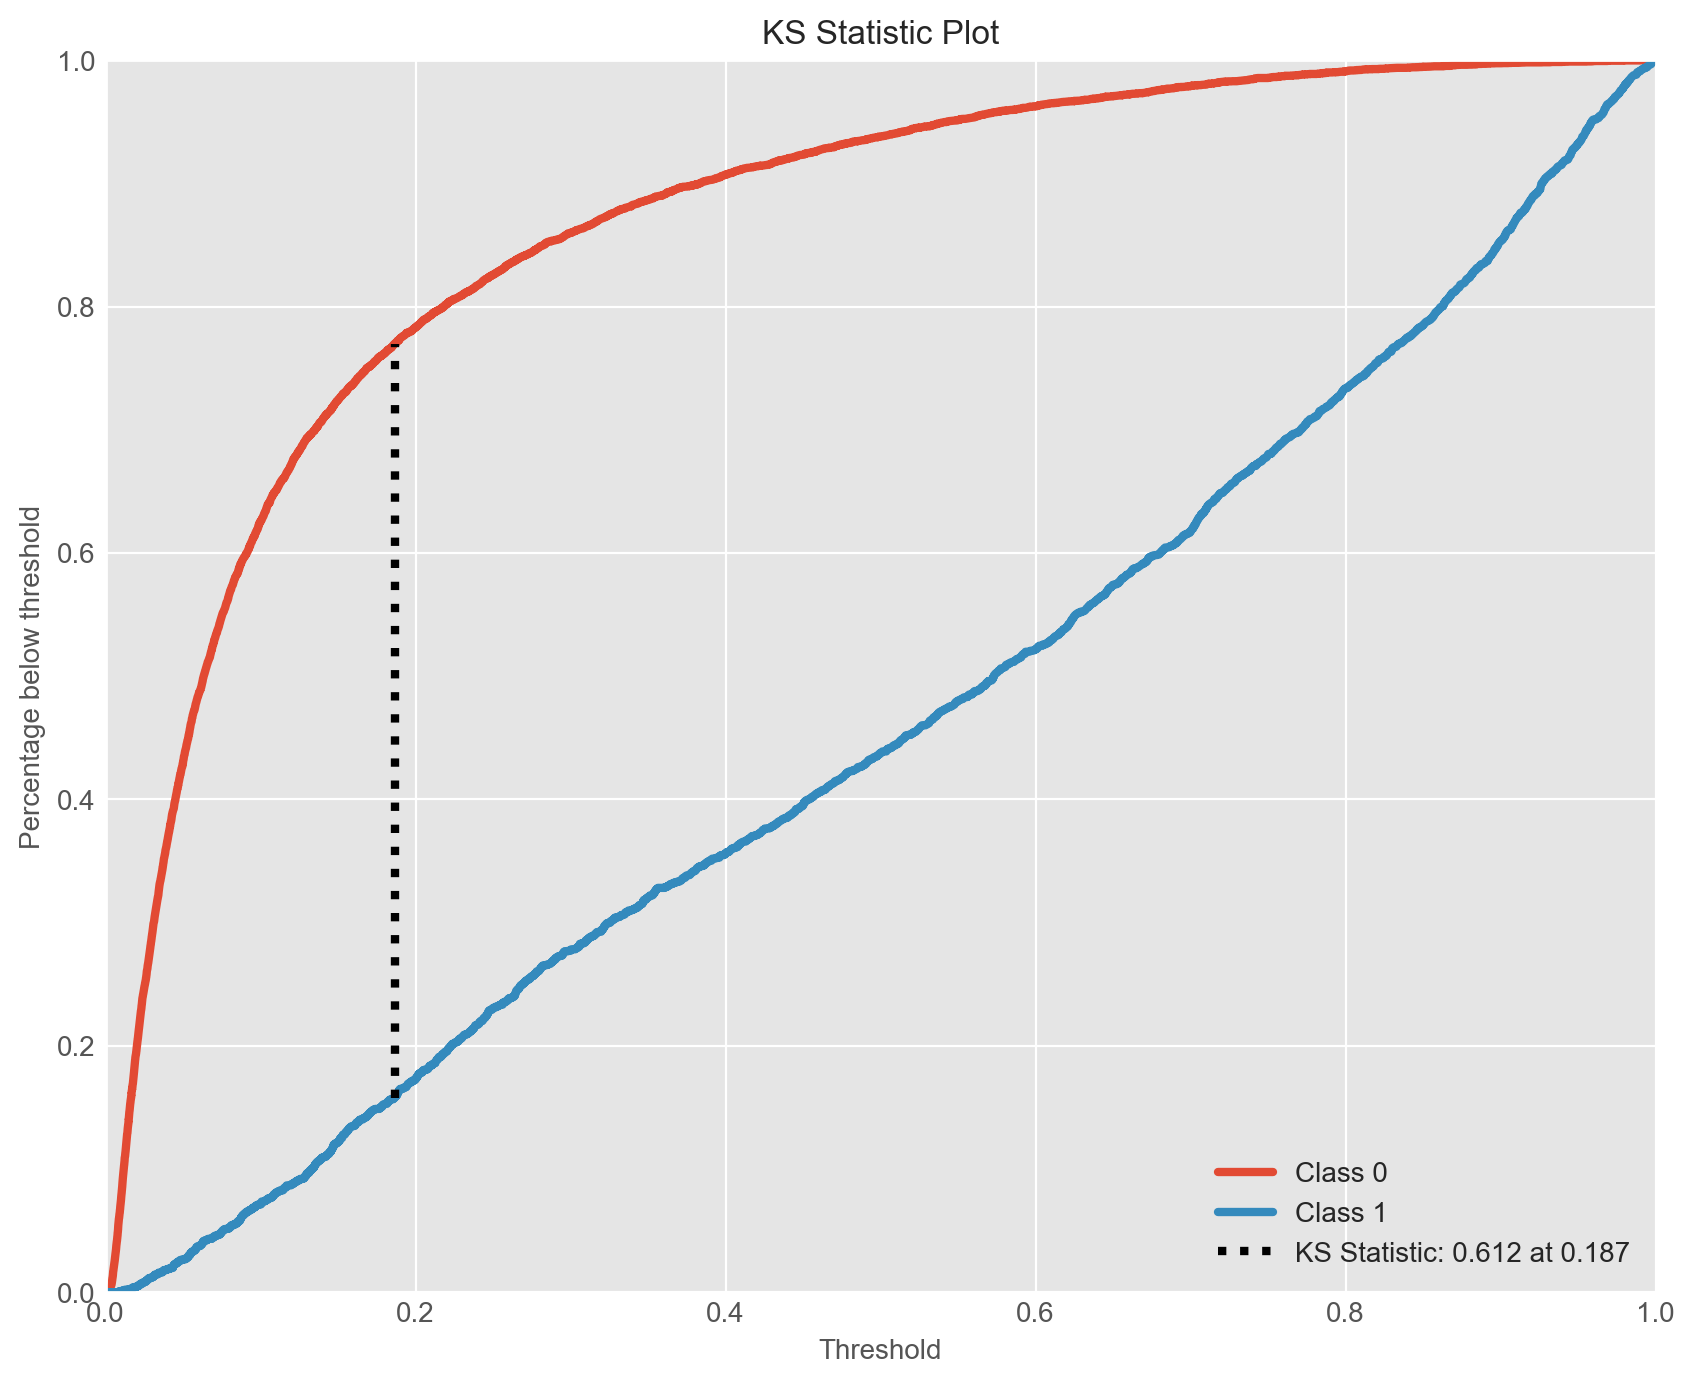

In [62]:
#procedemos a realizar el grafico de 

#ho: distribucion empirica es similar a la teorica
#h1: si la distribucion empirica no es similar  a la teorica

#skplt.plot_ks_statistic(y_train, y_pred_entre_2)

y_pred_test_2= np.array(pd.concat([1-y_pred_test, y_pred_test],axis=1))
skplt.plot_ks_statistic(y_test, y_pred_test_2)

Como el ks es 0.612, podemos decir que no rechazamos h0 y se cumple el supuesto de distribucion empirica es similar a la teorica.

In [63]:
from mletrics.classification import ks
ks(y_test, y_pred)

ModuleNotFoundError: No module named 'mletrics'

Comparando los indicadores antiguos y nuevos, podemos observar los cambios en el rendimiento del modelo:

La sensibilidad ha aumentado ligeramente en el nuevo modelo, lo que significa que el nuevo modelo está capturando un poco más de instancias positivas en comparación con el modelo antiguo.

La especificidad ha disminuido en el nuevo modelo, lo que indica que el nuevo modelo está clasificando un poco menos de instancias negativas correctamente en comparación con el modelo antiguo.

La precisión ha disminuido en el nuevo modelo, lo que significa que el nuevo modelo está clasificando un poco menos de instancias positivas correctamente en comparación con el modelo antiguo.

El F1 Score ha disminuido ligeramente en el nuevo modelo, lo que indica un pequeño deterioro en el equilibrio entre precisión y sensibilidad en comparación con el modelo antiguo.

El AUC Score ha disminuido ligeramente en el nuevo modelo, lo que sugiere que la capacidad de discriminación del nuevo modelo podría ser un poco menor que la del modelo antiguo.

En general, los cambios en los indicadores no son muy grandes, lo que podría indicar que los dos modelos tienen un rendimiento similar.

Pregunta 12
Utilizando el punto de corte encontrado, determine si el día de mañana lloverá.

pd.DataFrame({'MinTemp' : 7,
       'MaxTemp' : 18,
       'Lluvia'  : 0,
       'Evaporacion' : 7,
       'Sol' : 12,
       'VelRafaga' : 72,
       'Vel9am' : 10,
       'Vel3pm' : 54,
       'Hum9am' : 65,
       'Hum3pm' : 77,
       'Pres9am' : 1001,
       'Pre3pm' : 1025,
       'Nub9am' : 3,
       'Nub3pm' : 2,
       'Temp9am' : 11.4,
       'Temp3pm' : 16.2,
       'LluviaHoy' : 'No',
       'Koppen' : 'Subtropical',
       'Estacion' : 'Primavera'}, index = ['1'])


In [64]:

lluvia_prediccion=pd.DataFrame({'MinTemp' : 7,
    'MaxTemp' : 18,
    'Lluvia'  : 0,
    'Evaporacion' : 7,
    'Sol' : 12,
    'VelRafaga' : 72,
    'Vel9am' : 10,
    'Vel3pm' : 54,
    'Hum9am' : 65,
    'Hum3pm' : 77,
    'Pres9am' : 1001,
    'Pre3pm' : 1025,
    'Nub9am' : 3,
    'Nub3pm' : 2,
    'Temp9am' : 11.4,
    'Temp3pm' : 16.2,
    'LluviaHoy' : 'No',
    'Koppen' : 'Subtropical',
    'Estacion' : 'Primavera'}, index = ['1'])

In [ ]:
modelos_regrecionlog.predict(lluvia_prediccion)

1    0.026503
dtype: float64

Como el valor que nos da de 0.026503, el punto de corte el cual teniamos corresponde a 0.208974. Como el valor es menor al punto de corte, se puede decir que no llovera mañana.